# Анализ маркетинговых расходов Яндекс.Афиши

Цель: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.

Нужно изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Шаг 1. Загрузить данные и подготовить их к анализу

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
display(visits.head(10))
display(visits.tail(10))
display(visits.sample(10))
display(visits.describe())
display(visits.info())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


,Device,End Ts,Source Id,Start Ts,Uid
359390,desktop,2017-12-11 17:54:19,1,2017-12-11 17:54:00,18268369011883553090
359391,touch,2017-08-30 11:53:19,2,2017-08-30 11:53:00,18304232853749481866
359392,desktop,2017-12-30 21:49:19,4,2017-12-30 21:49:00,18311497973035795342
359393,desktop,2017-06-08 07:49:19,4,2017-06-08 07:49:00,18325675073358289850
359394,touch,2017-11-06 08:00:19,4,2017-11-06 08:00:00,18332905065174083046
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


,Device,End Ts,Source Id,Start Ts,Uid
149112,touch,2017-10-19 12:24:00,4,2017-10-19 12:04:00,15882354238222895417
322747,touch,2018-03-11 23:54:00,4,2018-03-11 23:50:00,1143037730167590236
157054,desktop,2017-10-23 15:42:00,3,2017-10-23 15:41:00,11883574560906653748
15694,desktop,2018-02-22 10:04:00,1,2018-02-22 09:43:00,12797725181267178743
175537,desktop,2018-04-05 21:54:00,5,2018-04-05 21:54:00,39186288429879207
140153,touch,2017-10-07 13:55:00,5,2017-10-07 13:54:00,14191130383399203479
171915,touch,2018-02-20 13:42:00,4,2018-02-20 13:22:00,4450420453809130560
124197,desktop,2017-11-24 09:29:00,3,2017-11-24 09:27:00,6120730272287189577
63370,desktop,2018-02-01 13:01:00,1,2018-02-01 12:18:00,4057098913112680625
6745,desktop,2018-04-19 21:00:00,1,2018-04-19 19:56:00,4672521744453945471


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

In [4]:
display(orders.head(10))
display(orders.tail(10))
display(orders.sample(10))
display(orders.describe())
display(orders.info())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


,Buy Ts,Revenue,Uid
50405,2018-05-31 23:36:00,0.61,1551265230644458155
50406,2018-05-31 23:40:00,1.16,13121453305610619664
50407,2018-05-31 23:40:00,2.26,15576344609395725707
50408,2018-05-31 23:42:00,0.92,15854392578508828030
50409,2018-05-31 23:43:00,3.67,1805512004303848280
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


,Buy Ts,Revenue,Uid
12663,2017-10-14 00:17:00,0.73,6616184802414561568
13155,2017-10-17 01:36:00,1.11,17105821158817364830
1414,2017-06-14 23:17:00,1.67,7162705463585487096
5349,2017-08-14 22:37:00,2.20,11248703014688054707
21526,2017-12-02 15:28:00,0.37,11401377186810902874
4773,2017-08-02 10:55:00,0.79,12309573230919654171
5105,2017-08-09 16:29:00,6.11,9189980038883537084
37313,2018-02-28 10:07:00,0.70,9399508115866528583
35575,2018-02-18 19:58:00,25.67,13260397970436173040
5539,2017-08-17 21:02:00,12.22,15196573517795681434


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

In [5]:
display(costs.head(10))
display(costs.tail(10))
display(costs.sample(10))
display(costs.describe())
display(costs.info())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


,source_id,dt,costs
2532,10,2018-05-22,21.70
2533,10,2018-05-23,7.42
2534,10,2018-05-24,10.79
2535,10,2018-05-25,22.21
2536,10,2018-05-26,7.89
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


,source_id,dt,costs
1576,5,2017-10-03,249.43
1381,4,2018-03-20,294.67
1236,4,2017-10-26,300.89
1035,3,2018-04-08,75.90
2234,10,2017-07-26,12.77
366,2,2017-06-04,79.08
1987,9,2017-11-19,26.74
1640,5,2017-12-06,200.93
1661,5,2017-12-27,197.18
242,1,2018-01-29,98.53


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

In [6]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']

In [7]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

In [8]:
visits.duplicated().sum()
orders.duplicated().sum()
costs.duplicated().sum()

0

Пропусков и дубликатов в данных нет, столбы с датами приведены к типу datetime.

In [9]:
visits['start_ts'].min()
visits['start_ts'].max()
visits['end_ts'].min()
visits['end_ts'].max()

Timestamp('2018-06-01 01:26:00')

Сессий, которые начинаются позже 31 мая 2017 года, нет, но есть сессии, которые заканчиваются первого июня 2018 года.

In [10]:
visits.query('end_ts > "2018-05-31 23:59:59"')

,device,end_ts,source_id,start_ts,uid
2330,desktop,2018-06-01 00:05:00,2,2018-05-31 23:30:00,5300693976971713685
43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,12296626599487328624
46667,desktop,2018-06-01 00:13:00,5,2018-05-31 23:48:00,1107134732939577311
154728,desktop,2018-06-01 00:09:00,2,2018-05-31 22:52:00,12484396335714047199
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583
216791,touch,2018-06-01 00:06:00,5,2018-05-31 23:45:00,9951896961656595558
263781,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4906562732540547408
269213,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,10723414689244282024
288563,touch,2018-06-01 00:01:00,4,2018-05-31 23:37:00,1094281763368510391
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366


In [11]:
visits = visits.query('end_ts < "2018-05-31 23:59:59"')

Оставила в таблице visits только сессии, которые закончились в 2017 году.

In [12]:
visits['device'].value_counts()

desktop    262559
touch       96829
Name: device, dtype: int64

In [13]:
visits['device'] = visits['device'].astype('category')

Так как в столбце device всего два значения, можно преобразовать в тип category.

In [14]:
visits['source_id'].value_counts()

4     101790
3      85609
5      66903
2      47624
1      34119
9      13277
10     10024
7         36
6          6
Name: source_id, dtype: int64

Максимальное число визитов по источнику 4, минимальное - по источникам 7 и 6 (меньше 0,5% от визитов по источнику 10, последнему среди источников с большим количеством визитов).
    
По источнику 4 визитов в 10 раз больше, чем по источнику 10, и в два раза больше, чем по источнику 2.

В топ-3 входят источники 4, 3 и 5.

## Шаг 2. Рассчитать метрики и построить графики

### 2.1. Продуктовые метрики

In [15]:
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].dt.week
visits['session_month'] = visits['start_ts'].dt.month
visits['session_year'] = visits['start_ts'].dt.year

In [16]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'})
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
display(int(dau_total.mean()))
display(int(wau_total.mean()))
display(int(mau_total.mean()))

907

5716

23227

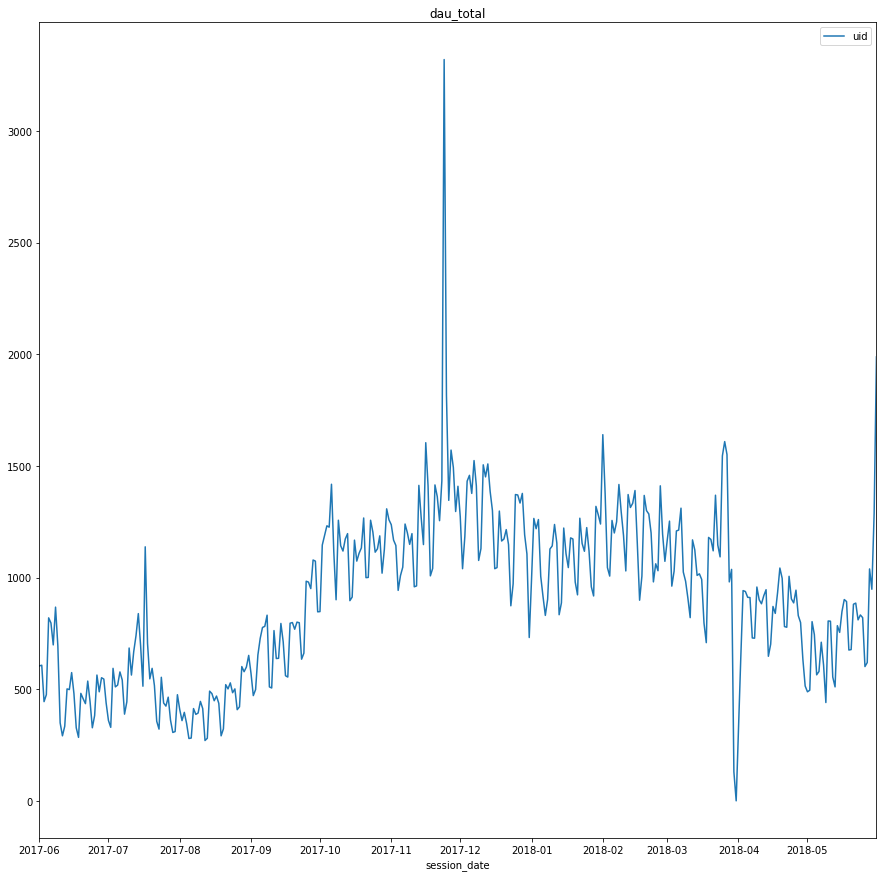

In [17]:
dau_total.plot(figsize=(15, 15))
plt.title('dau_total');

Наибольшее количество уникальных пользователей посетило сайт в декабре 2017, в апреле 2018 был день, когда посещений не было совсем, что может быть связано с техническими проблемами с сайтом.

С июня по сентябрь 2017 года количество уникальных пользователей, посетивших сайт, всего один раз превышало тысячу, было около 11 раз, когда количество пользователей было меньше 500.

В мае 2018 года количество пользователей один раз опускалось до 500. С октября 2017 по март 2018 года не опускалось до 500 и редко поднималось выше 1500.

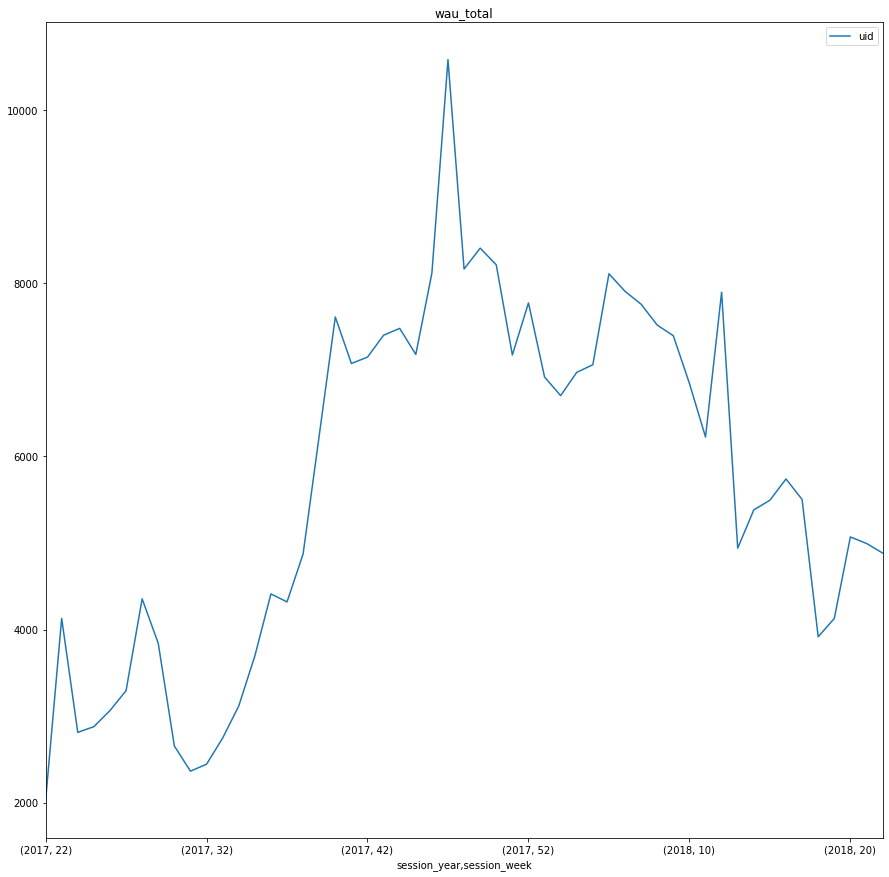

In [18]:
wau_total.plot(figsize=(15, 15))
plt.title('wau_total');

Пик количества уникальных пользователей, посетивших сайт за неделю, приходится примерно на 50-ю неделю.

Количество уникальных пользователей в неделю никогда не опускалось ниже 2000.

Примерно с 37-й недели 2017 года до 15-й недели 2018 количество пользователей не опускалось ниже 4000. С 42-й недели 2017 года до 9-ой недели 2018 года количество пользователей превышало 6000. С 10-й по 20-ю недели 2018 года количество пользователей не превышало 6000.

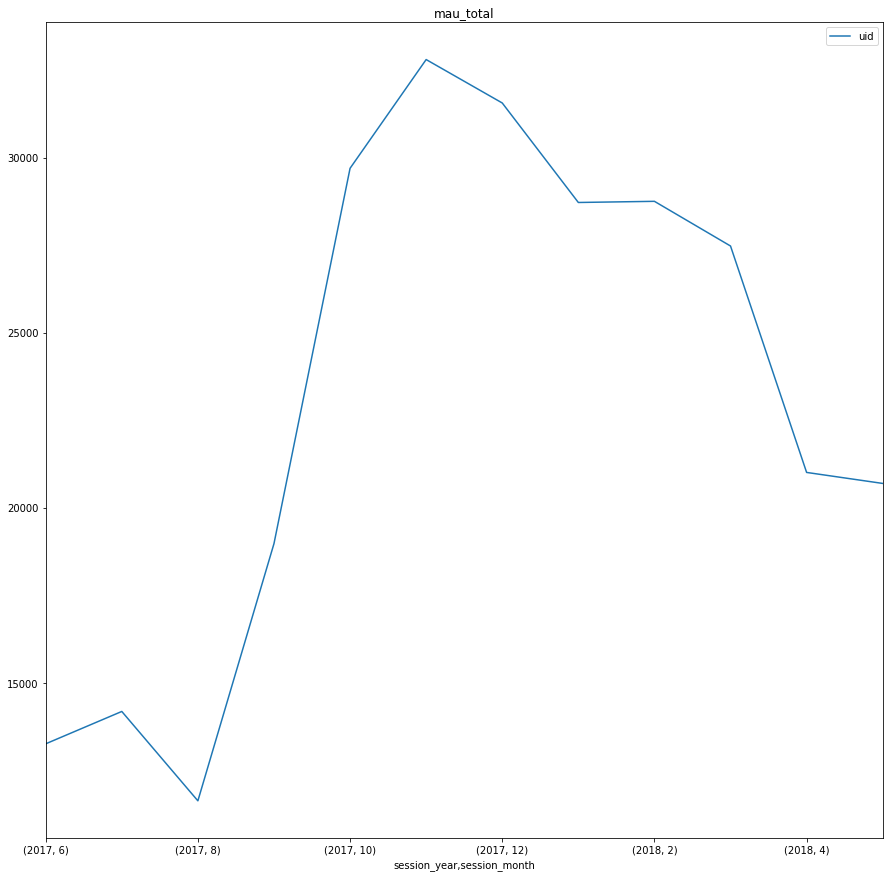

In [19]:
mau_total.plot(figsize=(15, 15))
plt.title('mau_total');

Начиная с августа 2017 года количество уникальных пользователей в месяц растёт. В апреле 2018 года падает, но всё ещё остаётся выше, чем до августа 2017 года.
    
Пик приходится на ноябрь 2017 года. В январе и феврале 2018 года количество пользователей сохранялось на одном уровне, потом начало снижаться.

За весь период среднее количество уникальных пользователей, посетивших сайт:
- в день (DAU) - 907,
- в неделю (WAU) - 5716,
- в месяц (MAU) - 23 228.
Наибольшее количество уникальных пользователей посетило сайт в декабре 2017 года.

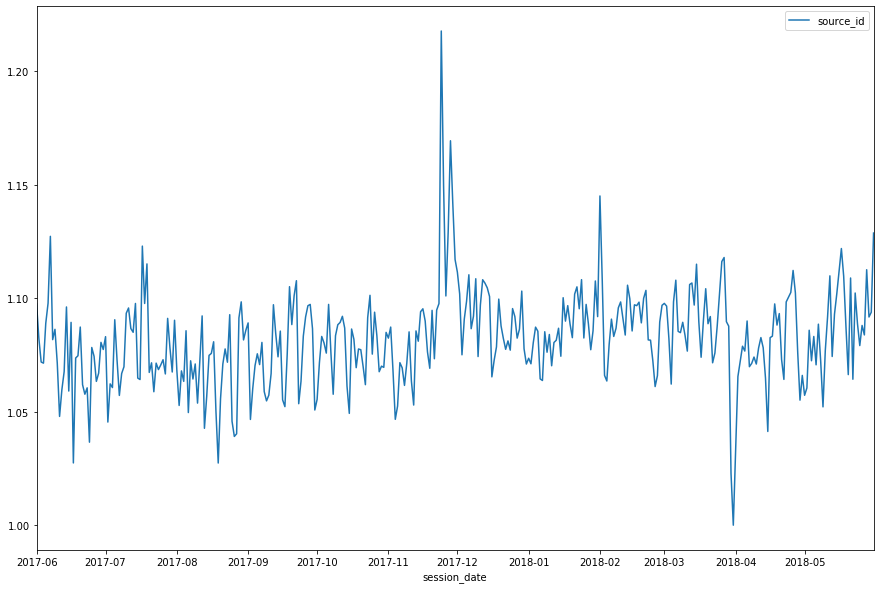

In [20]:
grouped_visits = visits.groupby(['session_date', 'uid'])['source_id'].count().reset_index()
grouped_visits.pivot_table(index='session_date', values='source_id', aggfunc='mean').plot(figsize=(15, 10));

Среднее количество заходов одного пользователя на сайт никогда не доходило до двух. Максимальное значение (в декабре 2017 года) - 1,2. В апреле 2018 года провал,что совпадает с данными метрики DAU. 

0    60
dtype: int64

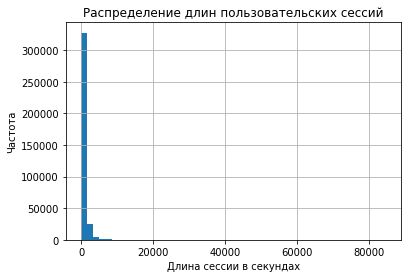

In [21]:
visits['asl'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
plt.title('Распределение длин пользовательских сессий')
plt.xlabel('Длина сессии в секундах')
plt.ylabel('Частота')
visits['asl'].hist(bins=50);
display(visits['asl'].mode())

Т.к. распределение длительности пользовательских сессий отличается от нормального, оцениваем среднюю длительность пользовательской сессии по моде, а не по среднему или медиане.

In [22]:
first_visit_date = visits.groupby('uid')['session_date'].min()
first_visit_date.name = 'first_visit_date'
visits_cohorts = visits.join(first_visit_date, on='uid')
visits_cohorts
#определила дату первого визита и добавила её в таблицу с визитами

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year,asl,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,0,2017-12-27
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,7,2017,19,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,1,2018,19,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,3,2018,19,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,11,2017,19,2017-11-02


In [23]:
visits_cohorts['visit_month'] = visits_cohorts['session_date'].astype('datetime64[M]')
visits_cohorts['first_visit_month'] = visits_cohorts['first_visit_date'].astype('datetime64[M]')
visits_cohorts['cohort_lifetime'] = ((visits_cohorts['visit_month'] - visits_cohorts['first_visit_month']) / np.timedelta64(1, 'M')).round().astype('int')
visits_cohorts = visits_cohorts.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
visits_cohorts
#опрелила месяц каждого визита и месяц первого визита
#нашла lifetime как разницу между месяцем конкретного визита и месяцем первого визит
#сгруппировала данные по месяцу первого визита (когорта) и lifetime, посчитала количество уникальных пользователей

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [24]:
initial_users_count = visits_cohorts[visits_cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})
visits_cohorts = visits_cohorts.merge(initial_users_count, on='first_visit_month')
#нашла количество пользователей в когорте в нулевой период её существования
#добавила пользователей за нулевой период к данным по когортам

In [25]:
visits_cohorts

,first_visit_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [26]:
visits_cohorts['retention_rate'] = visits_cohorts['uid'] / visits_cohorts['cohort_users']
#посчитала retention rate как отношение числа пользователей в когорте на определённый период к числу пользователей на нулевой период

In [27]:
visits_cohorts['first_visit_month'] = visits_cohorts['first_visit_month'].dt.date
#преобразовала название когорты в стороковый тип, чтобы убрать нули на графике

In [28]:
retention_visits = visits_cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='retention_rate', aggfunc='sum')

In [29]:
retention_visits

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


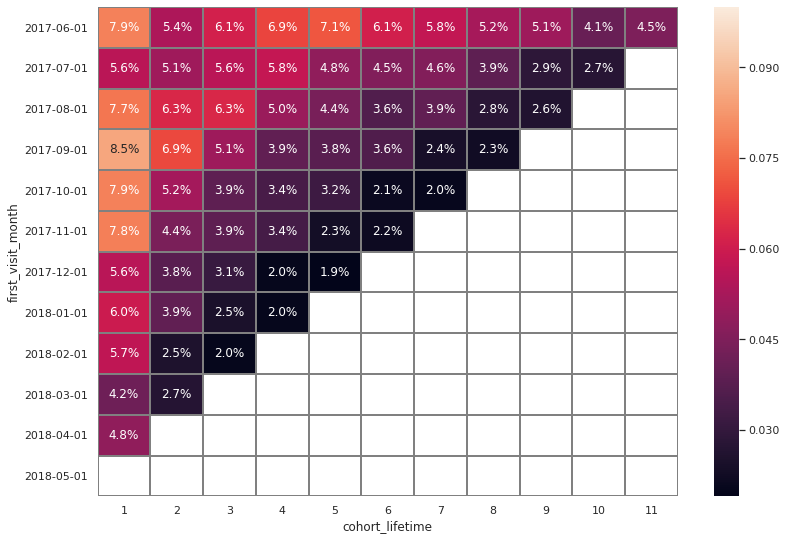

In [30]:
retention_visits = retention_visits.iloc[:, 1:]
sns.set(style='white')
plt.figure(figsize=(13, 9))
sns.heatmap(retention_visits, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1);

Retention Rate постепенно снижается. Наиболее высокий Retention Rate сохраняется у когорты июня 2017 года. У когорт с августа по ноябрь 2017 года высокий Retention Rate в первый месяц жизни, но со временем он снижается ниже, чем Retention Rate июньской когорты. У первой когорты Retention Rate возрастает на 3, 4, 5 и 6 месяцы жизни. У второй когорты на 2 и 3 месяцы. У остальных когорт Retention Rate стабильно падает.
    
В целом Retention Rate довольно низкий. Максимальный Retention Rate (8,5) у когорты сентября 2017 года в первый месяц жизни.

In [31]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'

In [38]:
display(visits_cohorts[visits_cohorts['cohort_lifetime'] == 2]['retention_rate'].mean())
display(orders_cohorts[orders_cohorts['cohort_lifetime'] == 2]['retention_rate'].mean())

0.0463326221636773

0.026994309207203453

In [39]:
display(retention_visits[2].mean())
display(retention_orders[2].mean())

0.0463326221636773

0.026994309207203453

In [40]:
display(retention_visits[1].mean())

0.06516659710392834

Средний Retention Rate на второй месяц жизни когорт - 6,5%.

С течение времени Retention Rate снижается.

### 2.2. Метрики электронной коммерции

In [41]:
first_visit_date = visits.groupby('uid')['start_ts'].min()
first_visit_date.name = 'first_visit_date'
orders = orders.join(first_visit_date, on='uid')

In [42]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date, on='uid')

In [43]:
orders['time_to_order'] = (orders['first_order_date'] - orders['first_visit_date']) / np.timedelta64(1, 'D') 

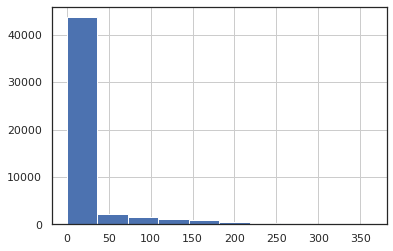

In [44]:
orders['time_to_order'].hist();

In [45]:
display(orders['time_to_order'].mean())
display(orders['time_to_order'].median())
display(orders['time_to_order'].mode())

17.617704008035687

0.015277777777777777

0    0.0
dtype: float64

In [46]:
display(orders['time_to_order'].median() * 24 * 60)

22.0

Т.к. распределение отличается от нормального, я решила, что можно использовать моду, но она даёт ноль, поэтому я посчитала медиану. В днях медиана очень маленькая, поэтому я переведла её в минуты. Получилось, что половина всех первых покупок совершается через 22 минуты после захода на сайт или раньше.

In [47]:
orders.groupby('uid')['buy_ts'].count().mean()

1.3803630588943954

За весь период на один пользователь совершает в среднем одну покупку.

In [48]:
orders['buy_ts'].min()

Timestamp('2017-06-01 00:10:00')

In [49]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

In [50]:
six_month = orders.query('"2017-06-01" <= buy_ts <= "2017-12-01"')

In [51]:
six_month = six_month.groupby('first_order_month').agg({'uid': ['nunique', 'count']}).reset_index()
six_month

first_order_month     uid      
                    nunique count
0        2017-06-01    2023  3441
1        2017-07-01    1923  2582
2        2017-08-01    1370  1822
3        2017-09-01    2581  3313
4        2017-10-01    4340  5278
5        2017-11-01    4081  4813

In [52]:
six_month.columns = ['cohort', 'users', 'orders']

In [53]:
six_month['mean_orders'] = six_month['orders'] / six_month['users']

In [54]:
six_month

,cohort,users,orders,mean_orders
0,2017-06-01,2023,3441,1.700939
1,2017-07-01,1923,2582,1.342694
2,2017-08-01,1370,1822,1.329927
3,2017-09-01,2581,3313,1.283611
4,2017-10-01,4340,5278,1.216129
5,2017-11-01,4081,4813,1.179368


В среднем в каждой когорте на одного пользователя в течение шести месяцев приходится одна покупка, исключение составляют когорты июня и ноября 2017 года, где на одного пользователя приходится почти две покупки (1,7).

In [55]:
grouped_orders = orders
grouped_orders['buy_ts'] = grouped_orders['buy_ts'].astype('datetime64[D]')
grouped_orders = grouped_orders.groupby('buy_ts')['revenue'].mean()

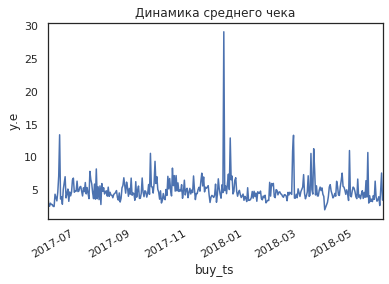

In [56]:
plt.title('Динамика среднего чека')
plt.ylabel('у.е')
grouped_orders.plot();

In [57]:
grouped_orders.mean()

4.936187581946566

Наибольший средний чек (29 у.е) был в декабре 2017 года. В другое время максимальный средний чек не превышал 15 у.е. В мае 2018 года средний чек опускался ниже 5 у.е., что скорее всего, связано с провалом количества посещений, который было видно на прошлых график, в частности на графике DAU. После мая 2018 года наблюдается несколько близкорасположенных пиков, превышающий 10 у.е., до этого похожие, но расположенные ещё ближе парные пики видны в апреле 2018 и в октябре 2017.
    
Средний чек за весь период - 5 у.е.

Наибольший средний чек в декабре может быть связан с новогодними праздниками. Другие пики (июль, ноябрь, апрель) могут быть связаны с сезонными акциями.

In [58]:
grouped_orders.sort_values(ascending=False)

buy_ts
2017-12-10    29.133313
2017-06-14    13.403396
2018-02-24    13.328986
2017-12-17    12.916950
2018-03-18    11.273562
                ...    
2018-05-29     2.598201
2017-06-03     2.484776
2017-06-07     2.466904
2017-06-08     2.452210
2018-03-30     1.948000
Name: revenue, Length: 364, dtype: float64

In [59]:
for_ltv = orders

In [60]:
cohort_sizes = for_ltv.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'size']
#посчитала количество пользователей в каждой когорте

In [61]:
for_ltv = for_ltv.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
#нашла выручку в каждой когорте за каждый месяц

In [62]:
for_ltv = for_ltv.merge(cohort_sizes, on='first_order_month')
#добавила количество пользвателей к когортам

In [63]:
for_ltv['age'] = ((for_ltv['order_month'] - for_ltv['first_order_month']) / np.timedelta64(1, 'M')).round().astype(int)
#посчитала возраст когорты так же, как раньше считала lifetime

In [64]:
for_ltv['ltv'] = for_ltv['revenue'] / for_ltv['size']
#рассчитала ltv как отношение выручки к количеству пользователей в когорте

In [65]:
#for_ltv = for_ltv.query('age >= 5')
#оставила только когорты, которые прожили не меньше 6 месяцев

Т.к. маржинальность 100%, выручку можно не менять.

In [66]:
for_ltv['first_order_month'] = for_ltv['first_order_month'].dt.date

In [67]:
ltv_pivot = for_ltv.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum').cumsum(axis=1)
ltv_pivot.fillna('')
#нашла средний ltv для каждой когорты в каждый период жизни

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


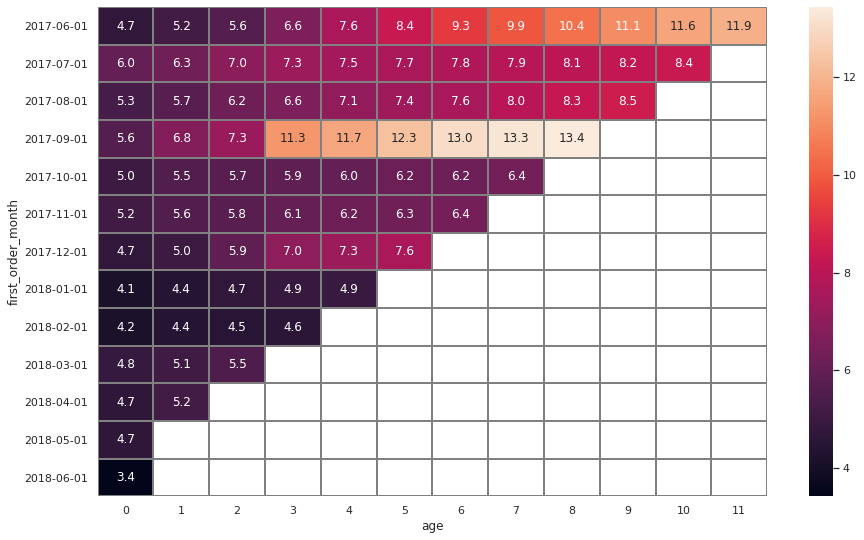

In [68]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(ltv_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray');

ltv по всем когортам растёт. 
    
Максимальный ltv (4,25) у когорты июня 2017.
    
Наиболее высокий ltv на шестой месяц жизни у когорт июня (0,7) и сентября (0,6) 2017. 
    
У когорты июля 2017 года ltv на десятый месяц жизни в четыре раза меньше, чем у когорты июня.
    
У когорты августа 2071 года ltv на девятый месяц жизни больше, чем у когорты июля.
    
Самый маленький ltv (0,12) на шестой месяц жизни у когорты октября 2017 года.

In [70]:
ltv_pivot[5].mean()

7.969052630207335

### 2.3. Маркетинговые метрики

In [71]:
grouped_costs = costs.groupby('source_id')['costs'].sum().reset_index()
grouped_costs.columns = ['source_id', 'costs']

In [72]:
grouped_costs.sort_values(by='costs', ascending=False)

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


In [73]:
grouped_costs['costs'].sum()

329131.6199999999

По всем источникам за весь период израсходовано - 329 131.6 у.е.
    
Топ-3 по расходам:
- источник 3 - 141 321.6,
- источник 4 - 61 073.6,
- источник 5 - 51 757.1
    
Расходы по источнику 3 больше, чем по источника 4 и 5 вместе взятым.

In [74]:
def costs_by_source(a):
    return costs.query('source_id == @a').plot(y='costs', x='dt')

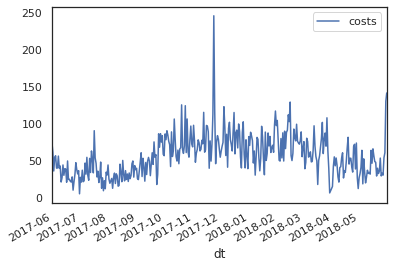

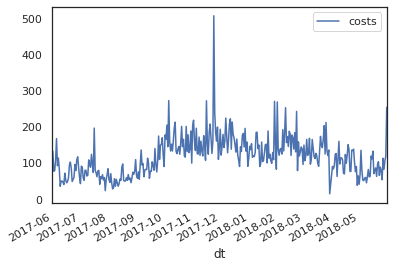

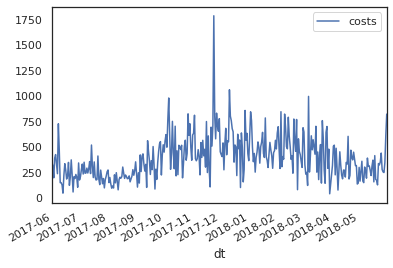

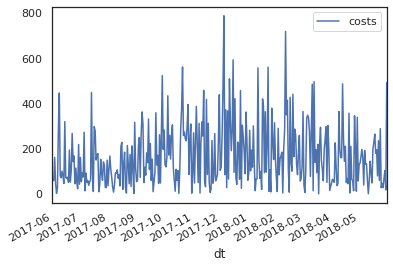

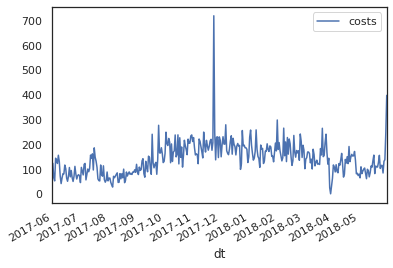

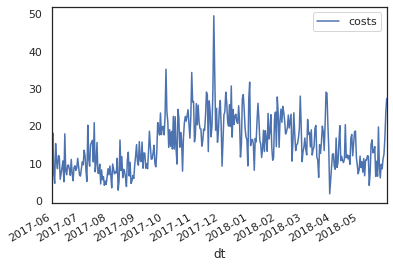

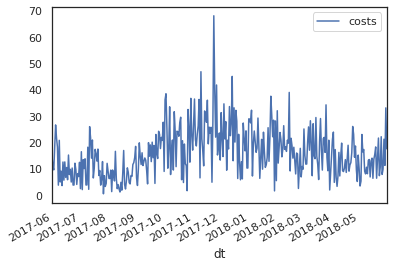

In [75]:
for i in [1, 2, 3, 4, 5, 9, 10]:
    costs_by_source(i)

In [76]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')

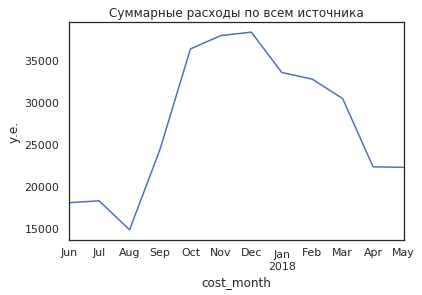

In [77]:
plt.title('Суммарные расходы по всем источника')
plt.ylabel('у.е.')
costs.groupby('cost_month')['costs'].sum().plot();

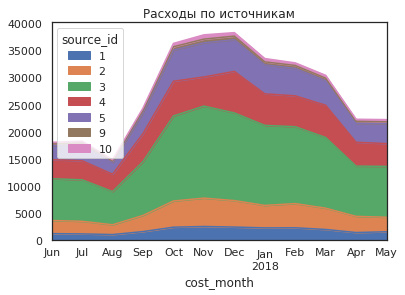

In [78]:
costs.pivot_table(index='cost_month', columns='source_id', values='costs', aggfunc='sum').plot.area(title=('Расходы по источникам'));

Динамика расходов по источникам, за исключением первого исочника, расходы по которому небольшие и сильно не менялись, совпадает с динамикой сумарных расходов по всем источникам.
    
Падение расходов приходится на август 2017 года, первый пик роста на октябрь 2017, второй на декабрь. После декабря 2017 года расходы по всем источникам снижаются, но остаются выше, чем были во время падения в августе.    

In [79]:
users_by_source = visits.groupby('source_id')['uid'].nunique().reset_index()
users_by_source.columns = ['source_id', 'users']

In [80]:
grouped_costs = grouped_costs.merge(users_by_source, on='source_id')
grouped_costs['cac'] = grouped_costs['costs'] / grouped_costs['users']

In [81]:
grouped_costs

,source_id,costs,users,cac
0,1,20833.27,18998,1.096603
1,2,42806.04,26244,1.631079
2,3,141321.63,74755,1.890464
3,4,61073.60,83523,0.731219
4,5,51757.10,56972,0.908466
5,9,5517.49,9264,0.595584
6,10,5822.49,8066,0.721856


In [82]:
costs['costs'].sum() / orders['uid'].nunique()

9.011626098622786

In [83]:
costs_by_months = costs.groupby('cost_month').agg({'costs': 'sum'}).reset_index()
users_by_months = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
users_by_months.columns = ['cost_month', 'users']
costs_by_months = costs_by_months.merge(users_by_months, on='cost_month')

In [84]:
costs_by_months['cac'] = costs_by_months['costs'] / costs_by_months['users']

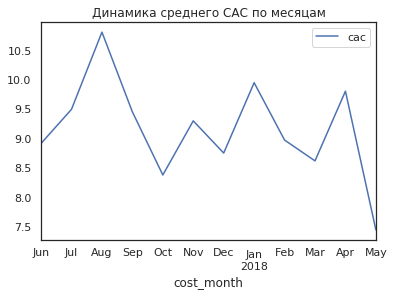

In [85]:
costs_by_months.plot(x='cost_month', y='cac', title='Динамика среднего CAC по месяцам');

Наибольший средний CAC был в августе 2017 года, хотя расходы по всем источникам трафика в этот перид были минимальны.
    
Средний CAC был низким в октябре и декабре 2017 года и в марте 2018. Расходы на привлечение пользвателей по всем источникам были высокими как в октябре, так и в декабре 2017 года.

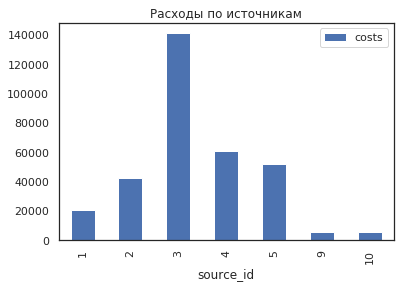

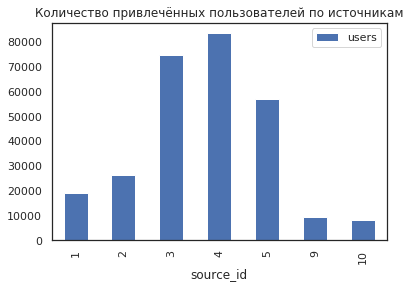

In [86]:
grouped_costs.plot(kind='bar', x='source_id', y='costs', title='Расходы по источникам');
grouped_costs.plot(kind='bar', x='source_id', y='users', title='Количество привлечённых пользователей по источникам');

Наибольшее количество пользователей привлечено по источникам 4, 3 и 5.

In [87]:
grouped_costs['costs'].sum() / grouped_costs['users'].sum()

1.1846852301113657

Средняя стоимость привления одного пользователя по всем источникам - 1 у.е.

In [88]:
visits = visits.merge(first_visit_date, on='uid')

In [89]:
first_visit_by_source = visits.groupby(['uid', 'first_visit_date'])['source_id'].first().reset_index()
first_visit_by_source.columns = ['uid', 'first_visit_date', 'source']

In [90]:
orders_new = orders[['revenue', 'first_order_month', 'order_month', 'first_visit_date']]

In [91]:
orders_new = orders_new.merge(first_visit_by_source, on='first_visit_date')

In [92]:
orders_new

,revenue,first_order_month,order_month,first_visit_date,uid,source
0,17.00,2017-06-01,2017-06-01,2017-06-01 00:09:00,10329302124590727494,1
1,0.55,2017-06-01,2017-06-01,2017-06-01 00:14:00,11627257723692907447,2
2,0.55,2017-06-01,2017-06-01,2017-06-01 00:14:00,16109239769442553005,2
3,0.55,2017-06-01,2017-06-01,2017-06-01 00:14:00,17384547788533003069,4
4,0.55,2017-06-01,2017-06-01,2017-06-01 00:14:00,11627257723692907447,2
...,...,...,...,...,...,...
85837,0.92,2018-05-01,2018-05-01,2018-05-31 23:26:00,15854392578508828030,4
85838,3.67,2018-05-01,2018-05-01,2017-12-07 23:20:00,1805512004303848280,2
85839,5.80,2018-05-01,2018-05-01,2018-05-31 23:05:00,11369640365507475976,10
85840,5.80,2018-05-01,2018-05-01,2018-05-31 23:05:00,11695064903107371394,4


В таблицу к покупкам добавлены источники первого перехода для каждого пользователя.

In [93]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')

In [94]:
def romi_by_cohorts_source(a):
    cohort_size = orders_new.query('source == @a').groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_size.columns = ['cohort', 'size']
    cohorts_source = orders_new.query('source == @a').groupby(['first_order_month', 'order_month']).agg({'uid': 'nunique', 'revenue': 'sum'}).reset_index()
    #отфильтровала данные по источнику трафика, сгруппировала по когорте и месяцам продаж, посчитала уникальных пользователей и выручку
    cohorts_source.columns = ['cohort', 'order_month', 'users', 'revenue']
    costs_by_cohorts_source = costs.query('source_id == @a').groupby('cost_month')['costs'].sum().reset_index()
    #отильтровала расходы по источнику, сгруппировала по месяцам
    costs_by_cohorts_source.columns = ['cohort', 'costs']
    cohorts_source = cohorts_source.merge(costs_by_cohorts_source, on='cohort')
    #использовала в качестве столбца для объединения столбец с месяцем первой покупки и столбец с месяцем расходов по источнику
    cohorts_source['age'] = ((cohorts_source['order_month'] - cohorts_source['cohort']) / np.timedelta64(1, 'M')).round().astype('int')
    #нашла возраст когорт
    cohorts_source = cohorts_source.merge(cohort_size, on='cohort')
    #добавила размер когорт
    cohorts_source['ltv'] = cohorts_source['revenue'] / cohorts_source['size']
    cohorts_source['cac'] = cohorts_source['costs'] / cohorts_source['size']
    cohorts_source['romi'] = cohorts_source['ltv'] / cohorts_source['cac']
    cohorts_source['cohort'] = cohorts_source['cohort'].dt.date
    pivot_source = cohorts_source.pivot_table(index='cohort', columns='age', values='romi', aggfunc='mean')
    pivot_source.cumsum(axis=1).round(2)
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    return sns.heatmap(pivot_source, annot=True, fmt='.3', linewidths=1, linecolor='gray');

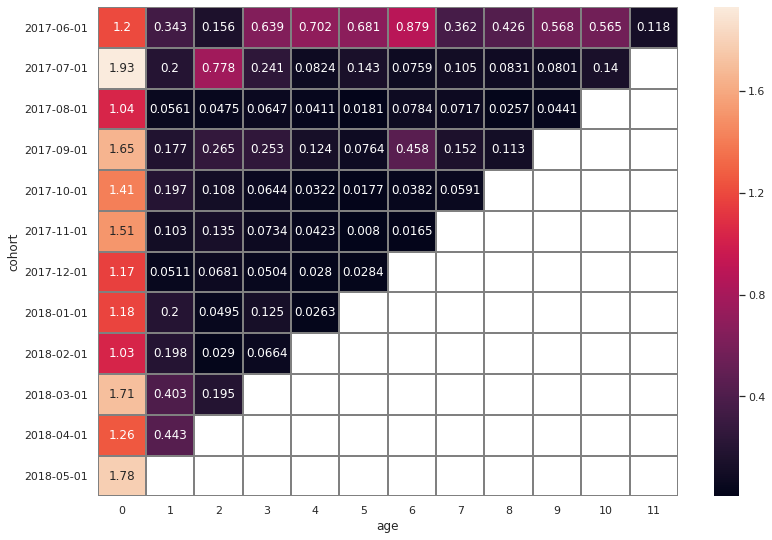

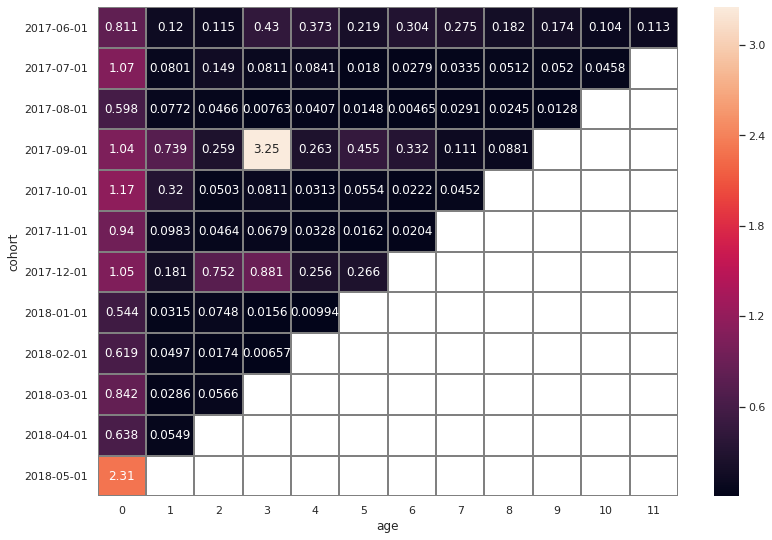

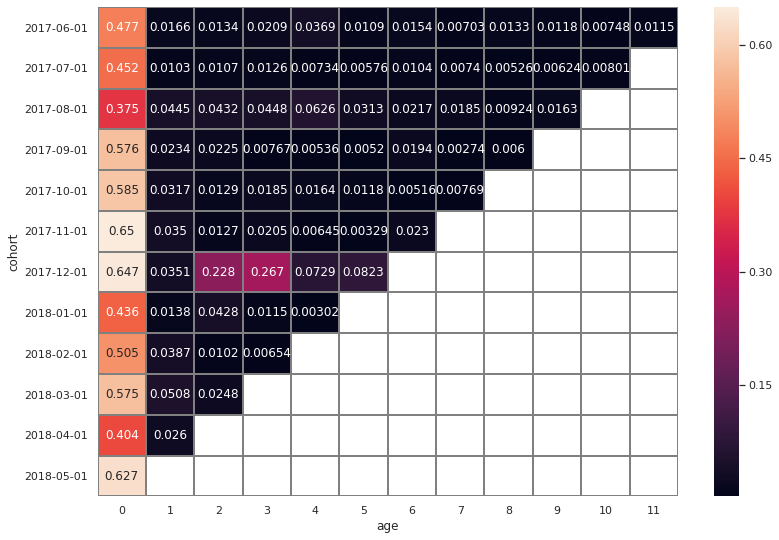

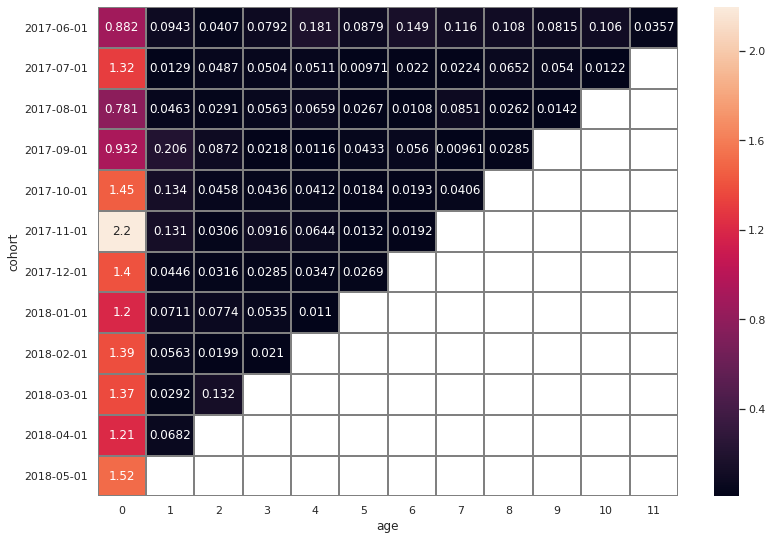

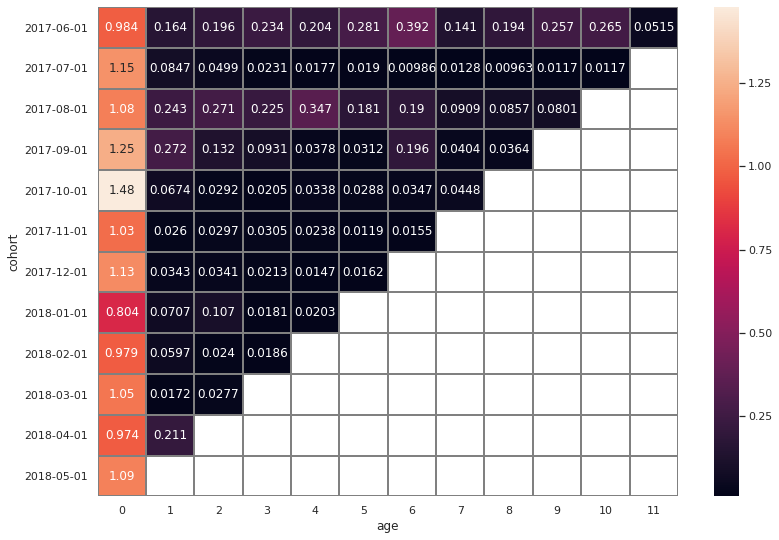

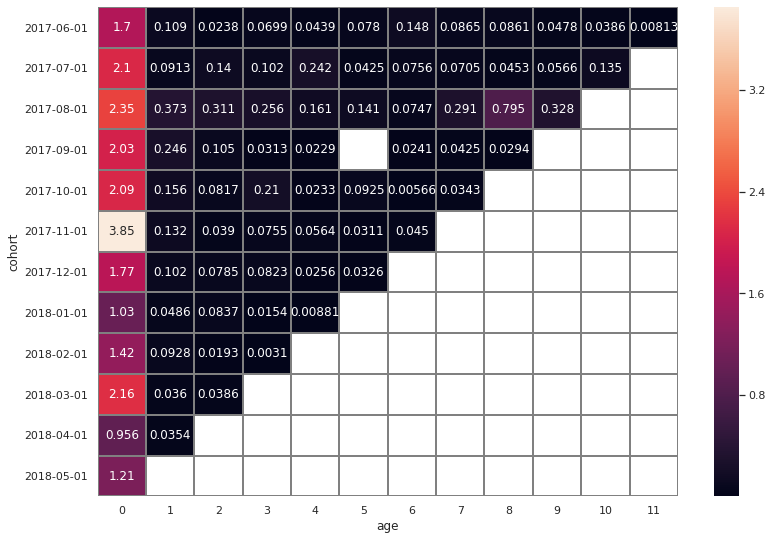

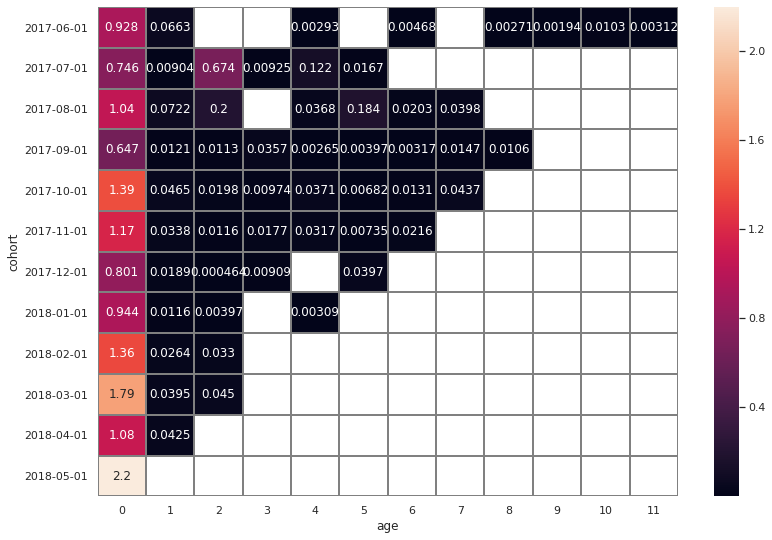

In [95]:
for i in [1, 2, 3, 4, 5, 9, 10]:
    romi_by_cohorts_source(i)

По первому источнику все когорты окупились в нулевой месяц, по второму источнику в нулевой месяц окупилось пять когорт, по третьему источнику когорты не окупились, по четвертому источнику девять когорт окупились в нулевой месяц, по пятому источнику две когорты окупились в нулевой месяц, остальные не окупились, по девятому источнику три когорты окупились в нулевой месяц, остальные не окупились, по десятому источнику четыре когорты окупились в нулевой месяц, остальные не окупились.

## Шаг 3. Сформулируйте выводы и рекомендации

Судя по ROMI упор стоит делать на источники 1 и 4, потому что по ним окупилось максимальное число когорт.
CAC по источнику с id 4 - 0,9, привлечено наибольшее количество пользователей.

#### Продуктовые метрики:
За весь период среднее количество уникальных пользователей, посетивших сайт:
- в день (DAU) - 907,
- в неделю (WAU) - 5716,
- в месяц (MAU) - 23 228. 

Наибольшее количество уникальных пользователей посетило сайт в декабре 2017 года, в апреле 2018 был день, когда посещений не было совсем, что может быть связано с техническими проблемами с сайтом. Рост числа пользователей в декабре может быть связан с праздничными акциями.
С июня по сентябрь 2017 года количество уникальных пользователей, посетивших сайт, всего один раз превышало тысячу, было около 11 раз, когда количество пользователей было меньше 500.
В мае 2018 года количество пользователей один раз опускалось до 500. С октября 2017 по март 2018 года не опускалось до 500 и редко поднималось выше 1500.
Пик количества уникальных пользователей, посетивших сайт за неделю, приходится примерно на 50-ю неделю.
Количество уникальных пользователей в неделю никогда не опускалось ниже 2000.
Примерно с 37-й недели 2017 года до 15-й недели 2018 количество пользователей не опускалось ниже 4000. С 42-й недели 2017 года до 9-ой недели 2018 года количество пользователей превышало 6000. С 10-й по 20-ю недели 2018 года количество пользователей не превышало 6000.
Начиная с августа 2017 года количество уникальных пользователей в месяц растёт. В апреле 2018 года падает, но всё ещё остаётся выше, чем до августа 2017 года.
Пик приходится на ноябрь 2017 года. В январе и феврале 2018 года количество пользователей сохранялось на одном уровне, потом начало снижаться.
Среднее количество заходов одного пользователя на сайт никогда не доходило до двух. Максимальное значение (в декабре 2017 года) - 1,2. В апреле 2018 года провал,что совпадает с данными метрики DAU.

Средний Retention Rate на второй месяц жизни когорт - 6,5%. Retention Rate по визитам постепенно снижается. Наиболее высокий Retention Rate сохраняется у когорты июня 2017 года. У когорт с августа по ноябрь 2017 года высокий Retention Rate в первый месяц жизни, но со временем он снижается ниже, чем Retention Rate июньской когорты. У первой когорты Retention Rate возрастает на 3, 4, 5 и 6 месяцы жизни. У второй когорты на 2 и 3 месяцы. У остальных когорт Retention Rate стабильно падает.
В целом Retention Rate довольно низкий. Максимальный Retention Rate (8,5) у когорты сентября 2017 года в первый месяц жизни.

#### Метрики электронной коммерции:
В среднем с первого посещения сайта до первой покупки проходит 17 дней.
За весь период на один пользователь совершает в среднем одну покупку.
В среднем в каждой когорте на одного пользователя в течение шести месяцев приходится одна покупка, исключение составляют когорты июня и ноября 2017 года, где на одного пользователя приходится почти две покупки (1,7).
Наибольший средний чек (29 у.е) был в декабре 2017 года.
ltv по всем когортам растёт. 
Максимальный ltv (4,25) у когорты июня 2017.
Наиболее высокий ltv на шестой месяц жизни у когорт июня (0,7) и сентября (0,6) 2017. 
У когорты июля 2017 года ltv на десятый месяц жизни в четыре раза меньше, чем у когорты июня.
У когорты августа 2071 года ltv на девятый месяц жизни больше, чем у когорты июля.
Самый маленький ltv (0,12) на шестой месяц жизни у когорты октября 2017 года.
Средний ltv за шесть месяцев - 3,3 у.е.

#### Маркетинговые метрики:
Максимальное число визитов по источнику 4, минимальное - по источникам 7 и 6 (меньше 0,5% от визитов по источнику 10, последнему среди источников с большим количеством визитов).
По источнику 4 визитов в 10 раз больше, чем по источнику 10, и в два раза больше, чем по источнику 2.
В топ-3 входят источники 4, 3 и 5.
По всем источникам, за исключение источника с id 4 (январь 2018), расходы максимальны в декабре 2017 года.